# **Lab 5: Quadrature**
**Felipe Vicencio**

# **Abstract**
This report contains implementations of 3 differen quadrature rules, which are methods of approximation for the definite integral of a function. 


# **About the code**

In [28]:
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Author: Felipe Vicencio Neumann
# Date: 15-2-2020

# Based on a template by Johan Hoffman:
# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [0]:
from google.colab import files
import numpy as np
import random
import matplotlib.pyplot as plt
import math

# **Introduction**

In this lab 3 methods for quadratures were implemented:
- The **Gauss quadrature**, which is exact for polynomials of certain grades depending of the number of points.
- The **Edge midpoint quadrature**, which takes midpoints of a triangle's sides.
- The **Monte Carlo quadrature**, which takes a large number of random points. This quadrature was implemented for both 1D and 2D functions.

# **Methods**

## 2-point Gauss quadrature:
As stated in the lecture notes, the Gauss quadrature rules are constructed to be exact for a polynomial integral of a certain degree $q$. This means that it's accuracy is directly related to how well the function taken can be approximated to a polynomial.
In order to construct the rule, we write:

$p(x) = \sum_{i=0}^qp(x_i)w_i$

So, for the 2-point Gauss rule over a unit interval we have:

$\int_0^1p(x)dx = p(x_0)w_0 + p(x_1)w_1 \Leftrightarrow \int_0^1\sum_{i=0}^3c_ix^i = \sum_{i=0}^3c_0x_0^iw_0 + \sum_{i=0}^3c_1x_1^iw_1$

Since $c_i \neq 0$,the correct $x_i$ and $w_i$ have to fulfill:

$w_0 + w_1 = w_0\\
w_0x_0 + w_1x_1 = \frac{1}{2}\\
w_0 x_0^2 + w_1 x_1^2 = \frac{1}{3}\\
w_0 x_0^3 + w_1 x_1^3 = \frac {1}{4}$

Which gives us:

$w_0 = w_1 = \frac{1}{2}\\
x_0 = \frac{3-\sqrt{3}}{6}\\
x_1 = \frac{3+\sqrt{3}}{6}$



In [0]:
def gauss2p(func):
	x1 = (3-3**(1/2))/6
	x2 = (3+3**(1/2))/6
	return (func(x1)/2 + func(x2)/2)

## 3-point edge midpoint Quadrature over a reference trinagle:

This quadrature rule uses the midpoint of each side of a triangle, and then averages the values of the function evaluated in those points. Then, to get the value, it only needs to multiply the average by the area of the triangle.
Since the reference triangle is always the same, we can always use:

$Areaa(T)\frac{(f(m1)+f(m2)+f(m3))}{3} =\frac{(f(0,0.5)+f(0.5,0)+f(0.5,0.5))}{6}\\ $

*$m_i$ is the midpoint of the $i$-th side

In [0]:
def midpoint3p(func):
	area = 1/2
	return area*(func(0.0,0.5)+func(0.5,0.0)+func(0.5,0.5))/3

## Monte Carlo Quadrature:

The Monte Carlo quadrature rule evaluates the function in random points in the interval (or aream in the case of the case of a 3D function) given, then takes the average of said values, and multiplies it by the length of the interval (or by the area of the triangle, in second  case, in which we use the reference triangle).

Since we will always be using the $[0,1]$ interval and the reference triangle, the length and volumes will always be $1$ and $\frac{1}{2}$ respectively.




In [0]:
def monte_carlo(func, n):
	s = 0
	for i in range(n):
		x = random.uniform(0.0, 1.0)
		s += func(x)
	return s/n

def monte_carlo2(func, n):
	s = 0
	i = 0
	while i < n:
		x = random.uniform(0.0, 1.0)
		y = random.uniform(0.0, 1.0)
		if (x+y) <= 1:
			s += func(x, y)
			i += 1
	return s/(n*2)

# **Results**


The Gauss quadrature and the edge midpoint quadrature methods were tested by randomly generating a large amount of appropiate functions, and comparing their results with the result of their respective integrals.

In [33]:
for n in range(5000):
  a, b, c, d, e, f = np.random.rand(6)

  #Gauss quadrature Tests:
  p = lambda x : a*(x**3) + b*(x**2) + c*x + d
  assert((gauss2p(p) - (a/4 + b/3 + c/2 + d)) < 0.000001)

  #3 point edge midpoint Tests:
  p = lambda x,y : a*(x**2) + b*(y**2) + c*x*y + d*x + e*y + f
  assert((midpoint3p(p)) - ((a+b)/12 + c/24 + (d+e)/6 + f/2) < 0.000001)
print("Gauss and Midpoint Tests successful \n")
  

Gauss and Midpoint Tests successful 



The Monte Carlo quadrature was tested by comparing $n$ vs $error(n)$, in other words, the amount of points taken, versus the error given when we use $n$ points for the quadrature.

The error should be close to $\frac{1}{\sqrt{n}}$, so we can graph $log(n)$ vs $log(error(n))$, and do a linear fit to approximate a slope. The test would be successful if the slope is close to $-\frac{1}{2}$.


Monte Carlo 1D Tests: 

f(x) = x^2 - x + 7/6 

n vs error(n):


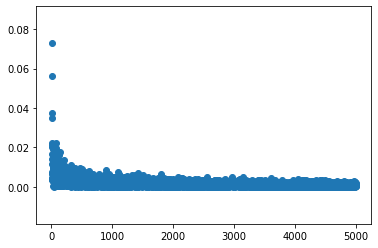


log(n) vs log(error(n))


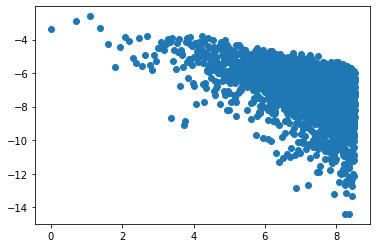


slope:  -0.5079445410770398 



In [34]:
#Monte Carlo 1D Test:

print("Monte Carlo 1D Tests: \n")

#f(x) = x**2 - x + 7/6   ->  Integral_0^1(f(x)) = 1
error1D = np.empty(5000)
p = lambda x : x**2 - x + 7.0/6.0
for i in range(5000):
  error1D[i] = abs(1.0 - monte_carlo(p, i+1))
print("f(x) = x^2 - x + 7/6 \n\nn vs error(n):")
plt.scatter([n + 1 for n in range(5000)], error1D) 
plt.show()
print("\nlog(n) vs log(error(n))")
plt.scatter([math.log(n+1) for n in range(5000)], [math.log(error1D[n]) for n in range(5000)])
plt.show()
print("\nslope: ", np.polyfit([math.log(n + 1) for n in range(5000)], [math.log(error1D[n]) for n in range(5000)], 1)[0], "\n")

f(x) = 6x^2 + 2x + 1 

n vs error(n):


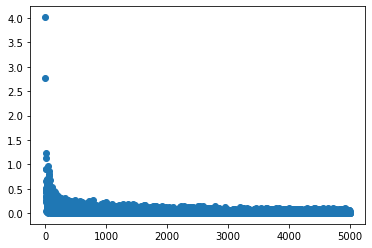


log(n) vs log(error(n))


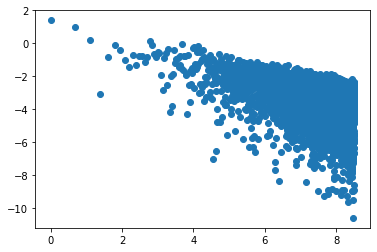


slope:  -0.5118804074841885 



In [35]:
#f(x) = 6*x**2 + 2*x + 1   ->  Integral_0^1(f(x)) = 4
error1D = np.empty(5000)
p = lambda x : 6*x**2 + 2*x + 1.0
for i in range(5000):
  error1D[i] = abs(4.0 - monte_carlo(p, i+1))
print("f(x) = 6x^2 + 2x + 1 \n\nn vs error(n):")
plt.scatter([n + 1 for n in range(5000)], error1D) 
plt.show()
print("\nlog(n) vs log(error(n))")
plt.scatter([math.log(n+1) for n in range(5000)], [math.log(error1D[n]) for n in range(5000)])
plt.show()
print("\nslope: ", np.polyfit([math.log(n + 1) for n in range(5000)], [math.log(error1D[n]) for n in range(5000)], 1)[0], "\n")

f(x) = sin(x) 

n vs error(n):


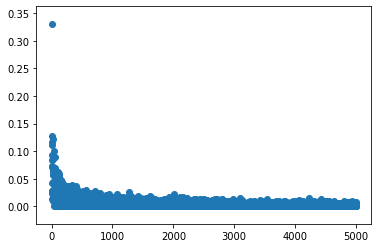


log(n) vs log(error(n))


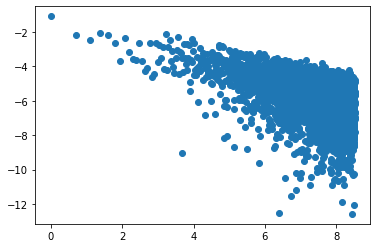


slope:  -0.5107564916654511 



In [36]:
#f(x) = sin(x)   ->  Integral_0^1(f(x)) = 1 - cos(1)
error1D = np.empty(5000)
p = lambda x : math.sin(x)
for i in range(5000):
  error1D[i] = abs(1 - math.cos(1) - monte_carlo(p, i+1))
print("f(x) = sin(x) \n\nn vs error(n):")
plt.scatter([n + 1 for n in range(5000)], error1D) 
plt.show()
print("\nlog(n) vs log(error(n))")
plt.scatter([math.log(n+1) for n in range(5000)], [math.log(error1D[n]) for n in range(5000)])
plt.show()
print("\nslope: ", np.polyfit([math.log(n + 1) for n in range(5000)], [math.log(error1D[n]) for n in range(5000)], 1)[0], "\n")


Monte Carlo 2D Tests: 

f(x) =  3x^2 + 3y^2 + 2x - 2y - 6 

n vs error(n):


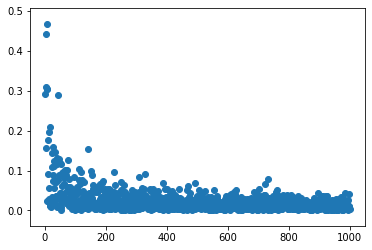


log(n) vs log(error(n))


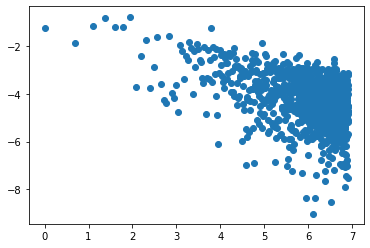


slope:  -0.47034068862688155 



In [37]:
#Monte Carlo 2D Test:

print("Monte Carlo 2D Tests: \n" )
#f(x) =  3*x**2 + 3*y**2 + 2*x - 2*y - 6   ->  Integral_refTriangle(f(x)) = -2.5
error2D = np.empty(1000)
p = lambda x,y : 3*x**2 + 3*y**2 + 2*x - 2*y - 6
for i in range(1000):
  error2D[i] = abs(-2.5 - monte_carlo2(p, i+1))
print("f(x) =  3x^2 + 3y^2 + 2x - 2y - 6 \n\nn vs error(n):")
plt.scatter([n + 1 for n in range(1000)], error2D) 
plt.show()
print("\nlog(n) vs log(error(n))")
plt.scatter([math.log(n+1) for n in range(1000)], [math.log(error2D[n]) for n in range(1000)])
plt.show()
print("\nslope: ", np.polyfit([math.log(n + 1) for n in range(1000)], [math.log(error2D[n]) for n in range(1000)], 1)[0], "\n")

f(x) = sin(x+y) 

n vs error(n):


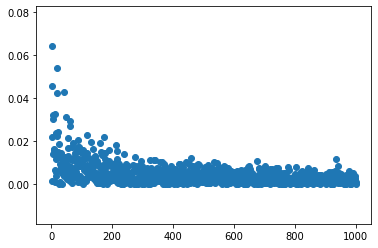


log(n) vs log(error(n))


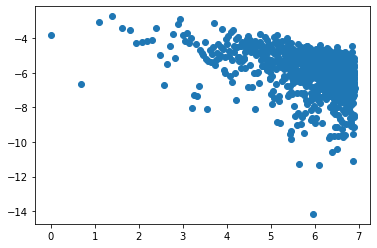


slope:  -0.497493211188709 



In [38]:
#f(x) = math.sin(x+y)   ->  Integral_refTriangle(f(x)) = sin(1) - cos(1)
error2D = np.empty(1000)
p = lambda x,y : math.sin(x+y)
for i in range(1000):
  error2D[i] = abs(math.sin(1) - math.cos(1) - monte_carlo2(p, i+1))
print("f(x) = sin(x+y) \n\nn vs error(n):")
plt.scatter([n + 1 for n in range(1000)], error2D) 
plt.show()
print("\nlog(n) vs log(error(n))")
plt.scatter([math.log(n+1) for n in range(1000)], [math.log(error2D[n]) for n in range(1000)])
plt.show()
print("\nslope: ", np.polyfit([math.log(n + 1) for n in range(1000)], [math.log(error2D[n]) for n in range(1000)], 1)[0], "\n")

f(x) = log(xy) 

n vs error(n):


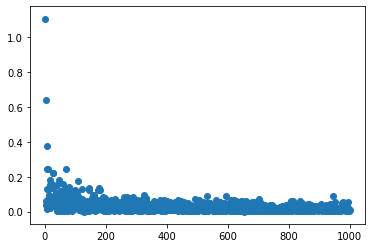


log(n) vs log(error(n))


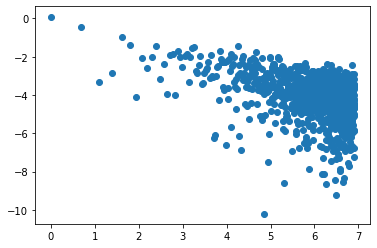


slope:  -0.5005211944732525 



In [39]:
#f(x) = log(xy)   ->  Integral_refTriangle(f(x)) = -1.5
error2D = np.empty(1000)
p = lambda x,y : math.log(x*y)
for i in range(1000):
  error2D[i] = abs(-1.5 - monte_carlo2(p, i+1))
print("f(x) = log(xy) \n\nn vs error(n):")
plt.scatter([n + 1 for n in range(1000)], error2D) 
plt.show()
print("\nlog(n) vs log(error(n))")
plt.scatter([math.log(n+1) for n in range(1000)], [math.log(error2D[n]) for n in range(1000)])
plt.show()
print("\nslope: ", np.polyfit([math.log(n + 1) for n in range(1000)], [math.log(error2D[n]) for n in range(1000)], 1)[0], "\n")

# Discussion
Most of the information was studied from wikipedia and the lecture notes\
The test show that all methods work as expected, and although the slopes for the Monte Carlos tests could be much closer to $0.5$ with a bigger $n$, that would also make them take to long to complete.\
Some parts of this report were made in collaboration with Fabián Levican.